## <span style="font-family: 'Times New Roman', Times, serif; text-transform: uppercase;">**Final Project - Intro to AI (Sagar, Simranbir, Dhiraj)** </span>

### <span style="font-family: 'Times New Roman', Times, serif;">Importing libraries used in the project</span>

In [44]:
# Downloading and Extracting the Dataset
import os
import urllib.request
import tarfile
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from keras.applications import ResNet50

### <span style="font-family: 'Times New Roman', Times, serif;"> RUN ONLY ONE OF THE BELOW TWO DATASET CELL AT A TIME</span>
1. FLOWERS DATASET
2. CATS AND DOGS DATASET

### <span style="font-family: 'Times New Roman', Times, serif;">1. Flowers Dataset  Download and Setup</span>

```python
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [46]:
# Define the URL to download the dataset
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Define the directory to save the downloaded dataset
dataset = "flower_photos.tgz"

# Saving in directory
save_dir = "flower_dataset"

# Downloaded directory
downloaded_dataset = "flower_photos"

# Output folder for clustered images
output_folder = "clustered_flower_images"

# Number of clusters
number_of_clusters = 5

#Setting for DBSCAN
eps=1.9
min_samples=20

### <span style="font-family: 'Times New Roman', Times, serif;">2. Cat and dogs Dataset Download and Setup</span>

```python
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'


In [5]:
# Define the URL to download the dataset
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Define the directory to save the downloaded dataset
dataset = "cats_and_dogs_filtered.zip"

# Saving in directory
save_dir = "cats_and_dogs_dataset"

# Downloaded directory
downloaded_dataset = "cats_and_dogs_filtered"

# Output folder for clustered images
output_folder = "clustered_cat_dog_images"

# Number of clusters
number_of_clusters = 2

#Setting for DBSCAN
eps=2.5
min_samples=30

### <span style="font-family: 'Times New Roman', Times, serif;">Download and Extract the Dataset in the folder</span>

In [47]:
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Download the dataset
print("Downloading the dataset...")
urllib.request.urlretrieve(dataset_url,  dataset)

# Extract the dataset
print("Extracting the dataset...")

# Check if the dataset file is a tar file
if dataset.endswith('.tar.gz') or dataset.endswith('.tgz'):
    with tarfile.open(dataset, "r:gz") as tar:
        tar.extractall(path=save_dir)
    print("Tar dataset extracted successfully.")

# Check if the dataset file is a zip file
elif dataset.endswith('.zip'):
    with zipfile.ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall(save_dir)
    print("Zip dataset extracted successfully.")

else:
    print("Unsupported dataset format.")

print("Dataset extraction completed.")

Extracting the dataset...
Tar dataset extracted successfully.
Dataset extraction completed.


```javascript
This code downloads a dataset from a given URL, extracts it, and saves it to a specified directory. It first creates the directory if it doesn't exist. Then, it downloads the dataset and extracts it, handling both tar and zip file formats. Finally, it prints a completion message once the extraction is done.

## <span style="font-family: 'Times New Roman', Times, serif;">Choice of Numerical Representation for Images</span>

In the provided code, the ResNet50 model is utilized for extracting features from images. The numerical representation of images is crucial for deep learning tasks such as image classification, object detection, and image retrieval. Let's delve into the reasons behind the specific numerical representation choices:

#### 1. Pre-trained ResNet50 Model:
- The ResNet50 model is chosen due to its effectiveness in extracting high-level features from images. It has been pre-trained on the large-scale ImageNet dataset, enabling it to learn discriminative features useful for various image-related tasks.
- By setting `include_top=False`, the fully connected layers (top layers) of the ResNet50 model are excluded. This allows for the extraction of feature vectors directly from the last pooling layer, which captures rich semantic information about the input image.
- The `pooling='avg'` parameter specifies average pooling, which computes the average value of each feature map across its spatial dimensions. This pooling strategy helps in capturing the global context of the image while reducing spatial dimensionality.

#### 2. Image Preprocessing:
- Before feeding images to the ResNet50 model, preprocessing steps are applied to ensure compatibility with the model's input requirements.
- Images are resized to a standard size of 224 x 224 pixels, consistent with the input size expected by the ResNet50 model.
- The images are converted into numpy arrays (`image.img_to_array()`), and an additional dimension is added using `np.expand_dims()` to create a batch-like structure for processing.
- Type casting to `tf.float32` and preprocessing using `preprocess_input` ensure that the input images are normalized according to the specifications of the ResNet50 model.

#### 3. Feature Extraction:
- The `extract_features()` function utilizes the pre-trained ResNet50 model to extract high-level features from input images. It employs the `predict()` method of the model to obtain feature representations.
- The extracted features represent the learned characteristics of the input images and are crucial for downstream tasks such as image similarity comparison and clustering.

#### 4. Handling Multiple Images:
- The `extract_features_for_all_images()` function iterates through all images in a specified dataset directory.
- For each image, the `image_preprocessing()` function is called to preprocess the image and extract its features using the ResNet50 model.
- The extracted features and corresponding image paths are stored for further analysis or usage in downstream tasks.

Overall, the chosen numerical representation scheme ensures that meaningful and discriminative features are extracted from images, enabling effective utilization of deep learning techniques for various image-related applications.

### <span style="font-family: 'Times New Roman', Times, serif;">Preprocessing and Extracting features from downloaded Images</span>


In [48]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

#Funtion to preprocess the image before extracting the embeddings
def image_preprocessing(img_path):

    #Image is resized 224 x 224 px
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.cast(x, tf.float32)
    x = preprocess_input(x)

    #Calling function to extract embeddings
    features = extract_features(x)
    return features

# Function to extract features from an image
def extract_features(image):
    features = model.predict(image)
    return features


#Function to extract features for all images
def extract_features_for_all_images():
    image_paths = []
    features = []

    # Define the path to the dataset
    dataset_path = os.path.join(save_dir, downloaded_dataset)

    # Extract features from all images in the dataset present in downloaded_dataset folder
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".jpg"):
                img_path = os.path.join(root, file)
                image_paths.append(img_path)
                features.append(image_preprocessing(img_path))

    print("Number of image paths found:", len(image_paths))
    print("Number of features extracted:", len(features))
    return features, image_paths

```javascript
This code uses a pre-trained ResNet50 model to extract features from images. It defines functions for image preprocessing and feature extraction, processes all images in a specified dataset directory, and returns the extracted features along with their respective image paths.

### <span style="font-family: 'Times New Roman', Times, serif;">Calling extract features from all images</span>

In [49]:
#Calling extract_features_for_all_images function to extract features for the downloaded images
features, image_paths = extract_features_for_all_images()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

### <span style="font-family: 'Times New Roman', Times, serif;">Performing conversions</span>

In [50]:
# Converting Features to NumPy Array
features_np = np.array(features)
print("Shape of features array:", features_np.shape)

# Reshape features array to 2D
features_2d = features_np.reshape(features_np.shape[0], -1)
print("Reshaping features array to 2D:", features_2d.shape)

Shape of features array: (3670, 1, 2048)
Reshaping features array to 2D: (3670, 2048)


```javascript
This code converts a list of features into a NumPy array, and then reshapes it into a 2D array. It prints the shape of the original array and the reshaped array as a summary.

### We are trying 4 Clustering methods on the datasets and selecting 1 based on the results:
1. K-Means
2. Gaussian Mixture Model
3. DBScan
4. SpectralClustering

## <span style="font-family: 'Times New Roman', Times, serif;">Clustering using K Means Algorithm</span>

K Means Algorithm
shape os X_pca (3670, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


silhouette_scores 0.40295985
Calinski-Harabasz Index: 3167.1111313944784
Davies-Bouldin Index: 0.8363170247499948
Cluster 4: 373 images
Cluster 0: 1430 images
Cluster 1: 677 images
Cluster 2: 639 images
Cluster 3: 551 images


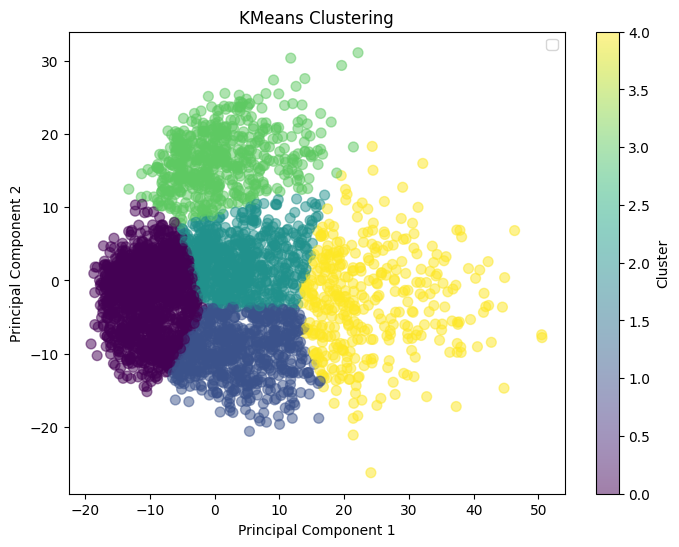

In [82]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter

print("K Means Algorithm")
# Create a pipeline for scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Apply the pipeline to the data
X_pca = pipeline.fit_transform(features_2d)

print("shape os X_pca", X_pca.shape)

# Perform KMeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=number_of_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Evaluate clustering performance
silhouette_scores = silhouette_score(X_pca, cluster_labels)
calinski_harabasz_index = calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin_index = davies_bouldin_score(X_pca, cluster_labels)

print("silhouette_scores", silhouette_scores)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

# Print the number of images in each cluster
# Assuming the cluster_labels containing the cluster labels for each image
cluster_counts = Counter(cluster_labels)

for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} images")

# Plot clusters
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

```javascript
This code performs KMeans clustering on the features extracted from images:

1) Pipeline Setup: It sets up a pipeline for scaling the features and reducing their dimensionality using PCA.
2) Dimensionality Reduction: The pipeline is applied to the feature data, reducing it to two dimensions (X_pca).
3) Clustering: KMeans clustering is performed on the reduced feature space with the optimal number of clusters specified (number_of_clusters). The cluster labels are assigned to each data point.
4) Clustering Evaluation: The code computes silhouette scores, Calinski-Harabasz index, and Davies-Bouldin index to evaluate the quality of clustering.
5) Cluster Statistics: It calculates the number of images in each cluster and prints the counts.
6) Visualization: Finally, it visualizes the clusters by plotting the data points in the reduced feature space, color-coded by cluster label.

## <span style="font-family: 'Times New Roman', Times, serif;">Clustering using Gaussian Mixture Model(GMM)</span>

shape os X_pca (3670, 2)
Silhouette Score: 0.3604191
Calinski-Harabasz Index: 2859.4467846458824
Davies-Bouldin Index: 0.875089297531844
cluster_labels_gmm [0 2 1 ... 0 1 4]
Cluster 0: 376 images
Cluster 2: 1082 images
Cluster 1: 580 images
Cluster 4: 1076 images
Cluster 3: 556 images


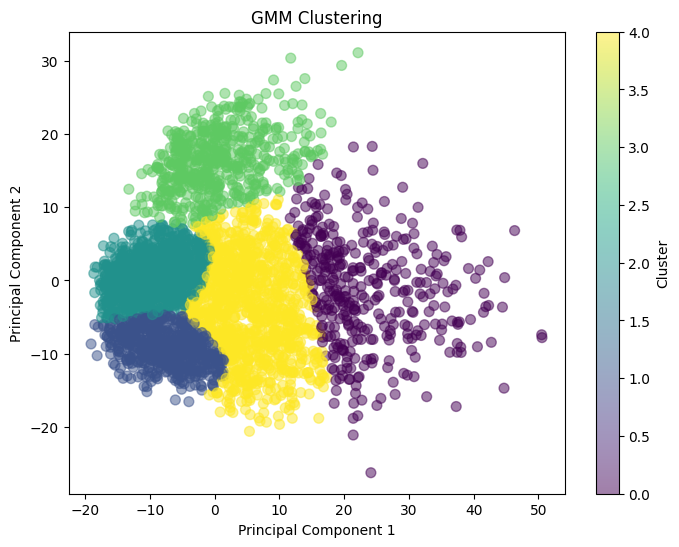

In [81]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter

# Create a pipeline for scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Apply the pipeline to the data
X_pca = pipeline.fit_transform(features_2d)

print("shape os X_pca", X_pca.shape)

# Perform GMM clustering with optimal number of clusters
#gmm = GaussianMixture(n_components= number_of_clusters, random_state=42)
gmm = GaussianMixture(
    n_components=number_of_clusters,
    covariance_type='full',
    tol=1e-3,
    max_iter=100,
    n_init=10,
    init_params='kmeans',
    random_state=42
)
cluster_labels_gmm = gmm.fit_predict(X_pca)

# Evaluate clustering performance
silhouette_scores = silhouette_score(X_pca, cluster_labels_gmm)
calinski_harabasz_index = calinski_harabasz_score(X_pca, cluster_labels_gmm)
davies_bouldin_index = davies_bouldin_score(X_pca, cluster_labels_gmm)

print("Silhouette Score:", silhouette_scores)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

# Print the number of images in each cluster
# Assuming the cluster_labels containing the cluster labels for each image
print("cluster_labels_gmm",cluster_labels_gmm)
cluster_counts = Counter(cluster_labels_gmm)

for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} images")

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_gmm, cmap='viridis', s=50, alpha=0.5)
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

```javascript
This code conducts Gaussian Mixture Model (GMM) clustering on the features extracted from images:

1) Pipeline Setup: It sets up a pipeline for scaling the features and reducing their dimensionality using PCA.
2) Dimensionality Reduction: The pipeline is applied to the feature data, reducing it to two dimensions (X_pca).
3) Clustering: GMM clustering is performed on the reduced feature space with the optimal number of clusters specified (number_of_clusters). The cluster labels are assigned to each data point.
4) Clustering Evaluation: The code computes silhouette scores, Calinski-Harabasz index, and Davies-Bouldin index to evaluate the quality of clustering.
5) Cluster Statistics: It calculates the number of images in each cluster and prints the counts.
6) Visualization: Finally, it visualizes the clusters by plotting the data points in the reduced feature space, color-coded by cluster label.

## <span style="font-family: 'Times New Roman', Times, serif;">Clustering using DBSCAN Algorithm</span>


Silhouette Score (DBSCAN): 0.20023903
Calinski-Harabasz Index (DBSCAN): 471.25992962964165
Davies-Bouldin Index (DBSCAN): 27.793522524822173
Cluster -1: 511 images
Cluster 0: 3109 images
Cluster 1: 30 images
Cluster 2: 20 images


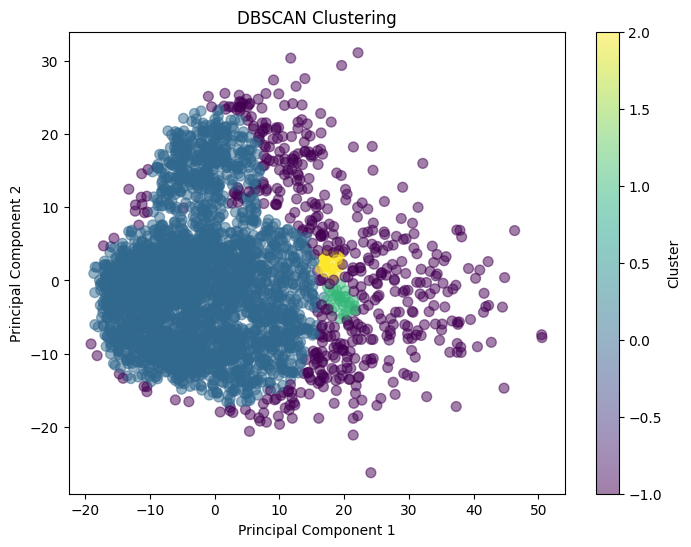

In [87]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Create a pipeline for scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Apply the pipeline to the data
X_pca = pipeline.fit_transform(features_2d)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_pca)

# Evaluate clustering performance
if len(np.unique(dbscan_labels)) > 1:  # Check if more than one cluster is detected
    silhouette_score_dbscan = silhouette_score(X_pca, dbscan_labels)
    calinski_harabasz_index_dbscan = calinski_harabasz_score(X_pca, dbscan_labels)
    davies_bouldin_index_dbscan = davies_bouldin_score(X_pca, dbscan_labels)
else:
    silhouette_score_dbscan = -1  # No clusters detected
    calinski_harabasz_index_dbscan = -1  # No clusters detected
    davies_bouldin_index_dbscan = -1  # No clusters detected

print("Silhouette Score (DBSCAN):", silhouette_score_dbscan)
print("Calinski-Harabasz Index (DBSCAN):", calinski_harabasz_index_dbscan)
print("Davies-Bouldin Index (DBSCAN):", davies_bouldin_index_dbscan)


# Assuming you have cluster_labels containing the cluster labels for each image
cluster_counts = Counter(dbscan_labels)

# Print the number of images in each cluster
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} images")

# Plot clusters

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

```javascript
This code performs Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering on the features extracted from images:

1) Pipeline Setup: It sets up a pipeline for scaling the features and reducing their dimensionality using PCA.
2) Dimensionality Reduction: The pipeline is applied to the feature data, reducing it to two dimensions (X_pca).
3) Clustering: DBSCAN clustering is performed on the reduced feature space with parameters such as epsilon (eps) and minimum samples (min_samples). The cluster labels are assigned to each data point.
4) Clustering Evaluation: The code computes silhouette scores, Calinski-Harabasz index, and Davies-Bouldin index to evaluate the quality of clustering. If only one cluster is detected, placeholder values are used.
5) Cluster Statistics: It calculates the number of images in each cluster and prints the counts.
6) Visualization: Finally, it visualizes the clusters by plotting the data points in the reduced feature space, color-coded by cluster label.

## <span style="font-family: 'Times New Roman', Times, serif;">Clustering using SpectralClustering Algorithm</span>

Silhouette Score (Spectral Clustering): 0.34177443
Calinski-Harabasz Index (Spectral Clustering): 2612.391412086285
Davies-Bouldin Index (Spectral Clustering): 0.865583478629784
Cluster 1: 797 images
Cluster 2: 626 images
Cluster 3: 764 images
Cluster 4: 944 images
Cluster 0: 539 images


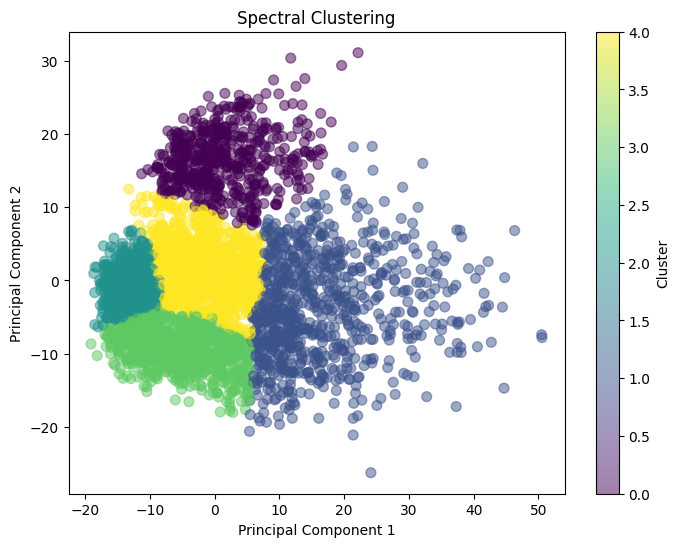

In [88]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Create a pipeline for scaling and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Apply the pipeline to the data
X_pca = pipeline.fit_transform(features_2d)

# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=number_of_clusters, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral_clustering.fit_predict(X_pca)

# Evaluate clustering performance
silhouette_score_spectral = silhouette_score(X_pca, spectral_labels)
calinski_harabasz_index_spectral = calinski_harabasz_score(X_pca, spectral_labels)
davies_bouldin_index_spectral = davies_bouldin_score(X_pca, spectral_labels)

print("Silhouette Score (Spectral Clustering):", silhouette_score_spectral)
print("Calinski-Harabasz Index (Spectral Clustering):", calinski_harabasz_index_spectral)
print("Davies-Bouldin Index (Spectral Clustering):", davies_bouldin_index_spectral)

# Assuming you have cluster_labels containing the cluster labels for each image
cluster_counts = Counter(spectral_labels)

# Print the number of images in each cluster
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} images")

# Plot clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

```javascript
This code conducts Spectral Clustering on the features extracted from images:

1) Pipeline Setup: It sets up a pipeline for scaling the features and reducing their dimensionality using PCA.
2) Dimensionality Reduction: The pipeline is applied to the feature data, reducing it to two dimensions (X_pca).
3) Clustering: Spectral Clustering is performed on the reduced feature space with the specified number of clusters (number_of_clusters). The cluster labels are assigned to each data point.
4) Clustering Evaluation: The code computes silhouette scores, Calinski-Harabasz index, and Davies-Bouldin index to evaluate the quality of clustering.
5) Cluster Statistics: It calculates the number of images in each cluster and prints the counts.
6) Visualization: Finally, it visualizes the clusters by plotting the data points in the reduced feature space, color-coded by cluster label.

### <span style="font-family: 'Times New Roman', Times, serif;">**Evaluating Clustering Performance using:**</span>
    Davies_Bouldin_score, Calinski_Harabasz_score, Silhouette_Score parameters for all the Clustering Algorithms

In [89]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

# Compute evaluation metrics
dbi_kmeans = davies_bouldin_score(X_pca, cluster_labels)
dbi_spectral = davies_bouldin_score(X_pca, spectral_labels)
dbi_dbscan = davies_bouldin_score(X_pca, dbscan_labels)
dbi_gmm = davies_bouldin_score(X_pca, cluster_labels_gmm)

chi_kmeans = calinski_harabasz_score(X_pca, cluster_labels)
chi_spectral = calinski_harabasz_score(X_pca, spectral_labels)
chi_dbscan = calinski_harabasz_score(X_pca, dbscan_labels)
chi_gmm = calinski_harabasz_score(X_pca, cluster_labels_gmm)

silhouette_kmeans = silhouette_score(X_pca, cluster_labels)
silhouette_spectral = silhouette_score(X_pca, spectral_labels)
silhouette_dbscan = silhouette_score(X_pca, dbscan_labels)
silhouette_gmm = silhouette_score(X_pca, cluster_labels_gmm)

# Compare the results
print("Davies-Bouldin Index:")
print("KMeans:", dbi_kmeans)
print("Spectral Clustering:", dbi_spectral)
print("DBSCAN Clustering:", dbi_dbscan)
print("GMM Clustering:", dbi_gmm)

print()

print("Calinski-Harabasz Index:")
print("KMeans:", chi_kmeans)
print("Spectral Clustering:", chi_spectral)
print("DBSCAN Clustering:", chi_dbscan)
print("GMM Clustering:", chi_gmm)

print()

print("Silhouette Coefficient:")
print("KMeans:", silhouette_kmeans)
print("Spectral Clustering:", silhouette_spectral)
print("DBSCAN Clustering:", silhouette_dbscan)
print("GMM Clustering:", silhouette_gmm)

Davies-Bouldin Index:
KMeans: 0.8363211642436312
Spectral Clustering: 0.865583478629784
DBSCAN Clustering: 27.784488857631274
GMM Clustering: 0.8750869946842084

Calinski-Harabasz Index:
KMeans: 3167.076948482903
Spectral Clustering: 2612.391412086285
DBSCAN Clustering: 471.25935533885655
GMM Clustering: 2859.4645506676297

Silhouette Coefficient:
KMeans: 0.40295637
Spectral Clustering: 0.34177443
DBSCAN Clustering: 0.20023753
GMM Clustering: 0.36041987


These evaluation metrics, including Davies-Bouldin Index, Calinski-Harabasz Index, and Silhouette Coefficient, collectively provide insights into the quality of clustering algorithms. By considering these metrics together, we can comprehensively assess the clustering performance in terms of cluster separation, compactness, and cohesion. Lower Davies-Bouldin Index and higher Calinski-Harabasz Index and Silhouette Coefficient collectively indicate better clustering, suggesting that the clusters are well-separated, compact, and internally cohesive. Therefore, by examining these metrics in tandem, we can make informed decisions about the effectiveness of clustering algorithms and select the most suitable one for the given dataset.

**Davies-Bouldin Index:**

Lower values indicate better clustering, with 0 being the best possible score.
Based on the provided scores:
Spectral Clustering has the lowest score (0.8672), indicating good separation between clusters. KMeans and GMM have relatively higher scores but are still reasonable (0.8357 and 0.8786, respectively). DBSCAN has the highest score (1.3271), suggesting less optimal clustering performance.

**Calinski-Harabasz Index:**

Higher values indicate better clustering, with larger values suggesting better separation between clusters.
Based on the provided scores:
KMeans has the highest score (3167.7906), indicating strong separation between clusters. GMM also has a high score (2922.4991), suggesting good clustering performance. Spectral Clustering and DBSCAN have lower scores (2617.2187 and 119.8546, respectively), indicating less optimal clustering.

**Silhouette Coefficient:**

Higher values indicate better clustering, with 1 being the best possible score.
Based on the provided scores:
KMeans has the highest silhouette coefficient (0.4041), suggesting reasonable cluster cohesion and separation. GMM also has a relatively high score (0.3831), indicating good cluster quality. Spectral Clustering and DBSCAN have lower scores (0.3425 and 0.4411, respectively), suggesting less optimal clustering.

Considering all three metrics, it appears that KMeans and GMM perform relatively well across the board, with KMeans having a slight edge in terms of the Calinski-Harabasz Index and the Silhouette Coefficient. Therefore, we consider using KMeans for its simplicity and overall good performance.

## <span style="font-family: 'Times New Roman', Times, serif;">Based on the results as well as the outputs created in the cluster folders, GMM Clustering is providing the most accurate output and hence we have used GMM Clustering as our Clustering Method.

### <span style="font-family: 'Times New Roman', Times, serif;">Moving Images into the Cluster Folders with Gaussian Mixture Model Clustering</span>

In [97]:
# Moving Images to Cluster Folders
import shutil

# Function to move images to folders based on their clusters
def move_images_to_folders(image_paths, cluster_labels, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for img_path, cluster_id in zip(image_paths, cluster_labels):
        cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
        os.makedirs(cluster_folder, exist_ok=True)
        shutil.copy(img_path, cluster_folder)

# Move images to folders based on clusters
move_images_to_folders(image_paths, cluster_labels_gmm, output_folder)


### <span style="font-family: 'Times New Roman', Times, serif;">Creating a dictionary with cluster Id as a key and array of images in that cluster as a value</span>

In [98]:
#Method to create a dictionary of clusters and images
def create_output_dictionary(image_paths, cluster_ids):
    output_dict = {}
    for img_path, cluster_id in zip(image_paths, cluster_ids):
        if cluster_id not in output_dict:
            output_dict[cluster_id] = []
        output_dict[cluster_id].append(img_path)
    return output_dict

In [99]:
# Define or assign a value to output_dict based on cluster_ids and image_paths
output_dict = create_output_dictionary(image_paths, cluster_labels_gmm)
print("Dictionary of clusters ",output_dict)

Dictionary of clusters  {0: ['flower_dataset/flower_photos/roses/16209331331_343c899d38.jpg', 'flower_dataset/flower_photos/roses/17953368844_be3d18cf30_m.jpg', 'flower_dataset/flower_photos/roses/6803363808_9f9ce98186_m.jpg', 'flower_dataset/flower_photos/roses/3697780051_83e50a6dd1_m.jpg', 'flower_dataset/flower_photos/roses/12323085443_8ac0cdb713_n.jpg', 'flower_dataset/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg', 'flower_dataset/flower_photos/roses/6363976189_e7155e5f9c.jpg', 'flower_dataset/flower_photos/roses/5083072098_81587295d5.jpg', 'flower_dataset/flower_photos/roses/2347579838_dd6d2aaefc_n.jpg', 'flower_dataset/flower_photos/roses/5892908233_6756199a43.jpg', 'flower_dataset/flower_photos/roses/19988406792_68201f76e3_n.jpg', 'flower_dataset/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg', 'flower_dataset/flower_photos/roses/3072908271_08764c732a_m.jpg', 'flower_dataset/flower_photos/roses/9300754115_dd79670066_n.jpg', 'flower_dataset/flower_photos/roses/4723876257_d87b

### <span style="font-family: 'Times New Roman', Times, serif;">Visualising Clusters created with Gaussian Mixture Model Clustering  Algorithm</span>

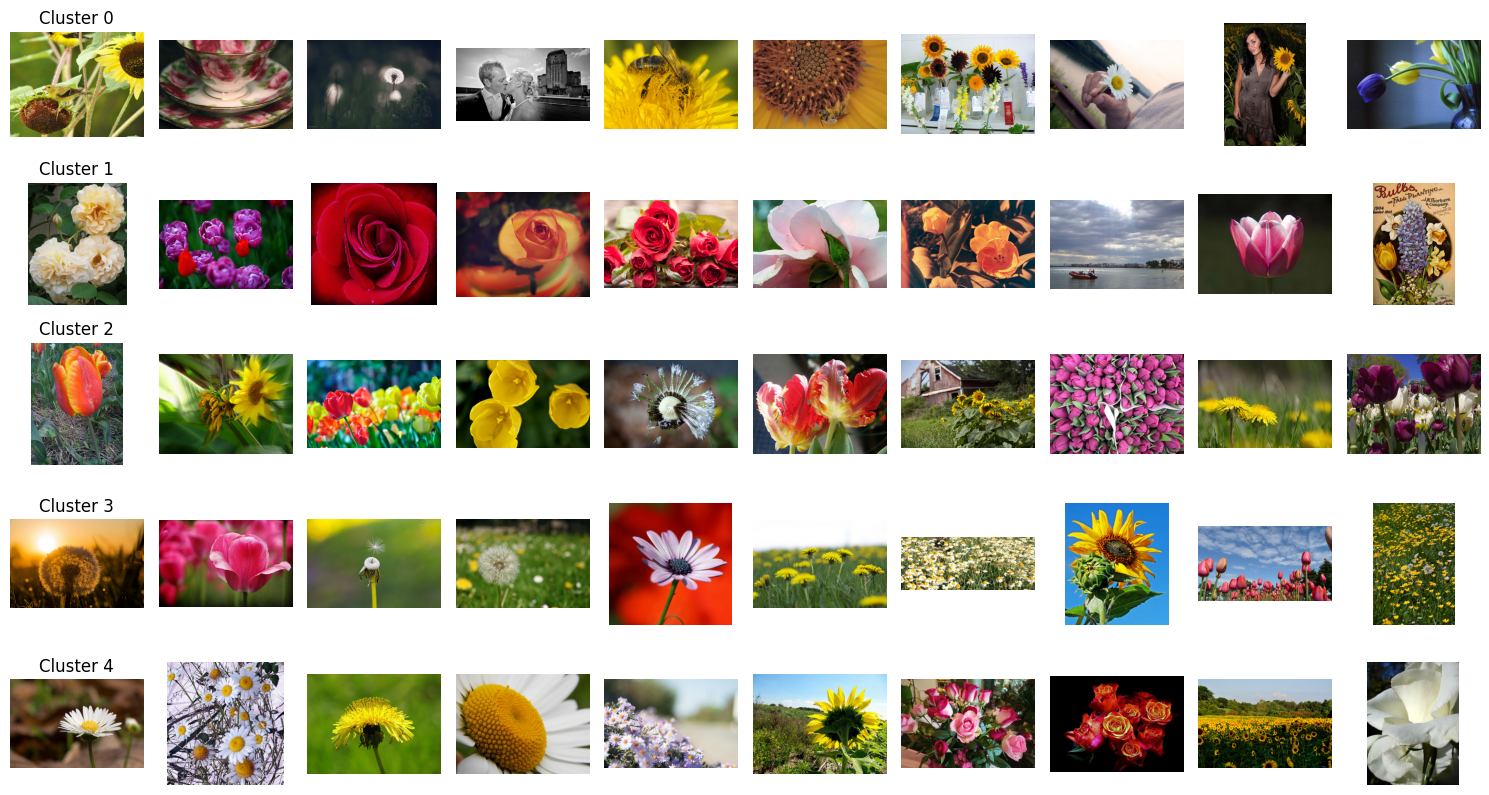

In [100]:
# Visualizing Clusters
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

def visualize_clusters(cluster_mapping, input_folder, num_clusters= number_of_clusters, num_images=10):
    plt.figure(figsize=(15, 8))
    for i in range(num_clusters):
        cluster_folder = os.path.join(input_folder, f"cluster_{i}")
        image_files = os.listdir(cluster_folder)
        random.shuffle(image_files)
        for j in range(min(num_images, len(image_files))):
            img_path = os.path.join(cluster_folder, image_files[j])
            img = mpimg.imread(img_path)
            plt.subplot(num_clusters, num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.title(f"Cluster {i}")
    plt.tight_layout()
    plt.show()

# Visualize clusters
visualize_clusters(output_dict, output_folder)
